In [96]:
import numpy as np
import analysis_utils as au
import matplotlib.pyplot as plt
from qdisk.utils import is_within
%matplotlib widget
%load_ext autoreload
%autoreload 2

profilename = au.VADPpath + "L1489IRS_SBLB_continuum_robust_1.0.image.tt0_radialProfileWedge90deg.txt"
r, I, dI = np.loadtxt(profilename, unpack=True)
I *= 1e3
dI *=1e3

# fit_radii = (0, 3.0) # fitting radii from visual inspection onto the image
# I = I[is_within(r, fit_radii)] * 1e3
# dI = dI[is_within(r, fit_radii)] * 1e3
# r = r[is_within(r, fit_radii)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[(0.0, 5.0),
 None,
 Text(0.5, 0, 'Radius [arcsec]'),
 Text(0, 0.5, 'Intensity [mJy / beam]')]

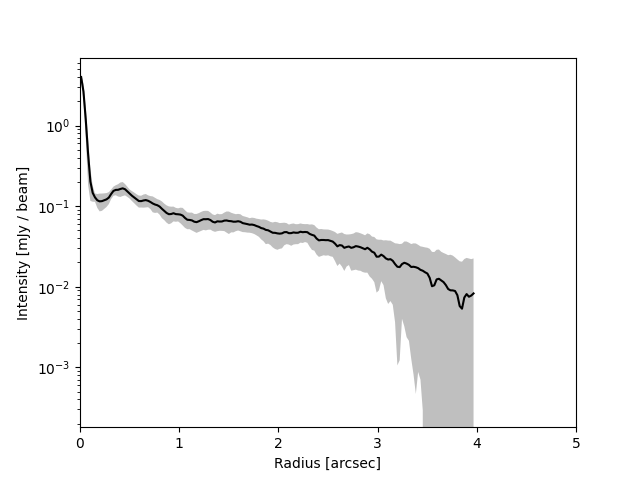

In [97]:
fig, ax = plt.subplots()
ax.plot(r, I, color="black")
ax.fill_between(r, I-dI, I+dI, color="black", alpha=0.25, edgecolor=None)
ax.set(xlim=(0, 5), yscale="log", xlabel="Radius [arcsec]", ylabel="Intensity [mJy / beam]")

In [98]:
# ring model
import lmfit as lf
from analysis_utils import Gaussian1d, GaussianRing1d

p0 = [-1.4, 0.05, 0.3, -1, 0.23, 0, 2]
bounds = ([-3, 0.01, 0.05, -3, 0.05, -3, 0.5], [2, 0.1, 0.7, 2, 0.5, 2, 3])

model = (
    lf.Model(Gaussian1d, prefix="compact_")
    + lf.Model(GaussianRing1d, prefix="ring_")
    + lf.Model(Gaussian1d, prefix="broad_")
)

initial_guess = dict(
    compact_F=-1.4,
    compact_sigma=0.05,
    ring_r0=0.3,
    ring_F=-1.0,
    ring_sigma=0.23,
    broad_F=0.0,
    broad_sigma=1.0
)
bounds = dict(
    compact_F=(-3, 2),
    compact_sigma=(0.01, 0.1),
    ring_r0=(0.0, 0.7),
    ring_F=(-3, 2),
    ring_sigma=(0.05, 0.5),
    broad_F=(-3, 2),
    broad_sigma=(0.5, 3)
)
params = model.make_params()

for name in model.param_names:
    params[name].set(
        value=initial_guess[name], min=bounds[name][0], max=bounds[name][1], vary=True
    )


In [99]:
result = model.fit(r=r, data=I, weights=dI**-1, params=params, method="leastsq")

Text(0.5, 1.0, 'Ring model')

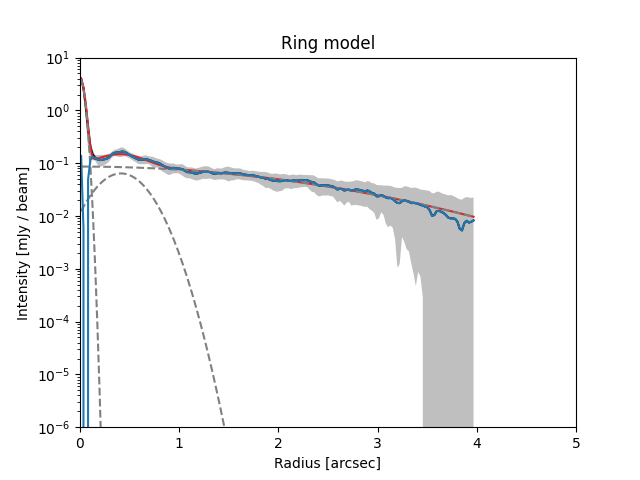

In [101]:
fig, ax = plt.subplots()
ax.plot(r, I, color="black")
ax.fill_between(r, I-dI, I+dI, color="black", alpha=0.25, edgecolor=None)
ax.plot(r, result.best_fit, color="tab:red")
comps = result.eval_components()
ax.plot(r, comps["compact_"], ls="dashed", color="grey")
ax.plot(r, comps["ring_"], ls="dashed", color="grey")
ax.plot(r, comps["broad_"], ls="dashed", color="grey")
ax.plot(r, I - comps["compact_"])
ax.set(yscale="log", ylim=(1e-6, 10), xlim=(0, 5), xlabel="Radius [arcsec]", ylabel="Intensity [mJy / beam]")
ax.set_title("Ring model")

In [77]:
fig.savefig(au.figurepath+"L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge90deg_ring_fit.png", dpi=500, bbox_inches="tight", pad_inches=0.01)

In [102]:
# gap model
import lmfit as lf
from analysis_utils import Gaussian1d, GaussianRing1d, PowerLaw

model = (
    lf.Model(Gaussian1d, prefix="compact_")
    - lf.Model(GaussianRing1d, prefix="gap_")
    + lf.Model(PowerLaw, prefix="broad_")
)

initial_guess = dict(
    compact_F=-1.4,
    compact_sigma=0.05,
    gap_r0=0.2,
    gap_F=-1.0,
    gap_sigma=0.23,
    broad_F=0.0,
    broad_p=-1.0
)
bounds = dict(
    compact_F=(-3, 2),
    compact_sigma=(0.01, 0.1),
    gap_r0=(0.0, 0.7),
    gap_F=(-3, 2),
    gap_sigma=(0.05, 0.5),
    broad_F=(-3, 2),
    broad_p=(-3, -0.1)
)
params = model.make_params()

for name in model.param_names:
    params[name].set(
        value=initial_guess[name], min=bounds[name][0], max=bounds[name][1], vary=True
    )


In [103]:
result = model.fit(r=r, data=I, weights=dI**-1, params=params, method="leastsq")

Text(0.5, 1.0, 'Gap model')

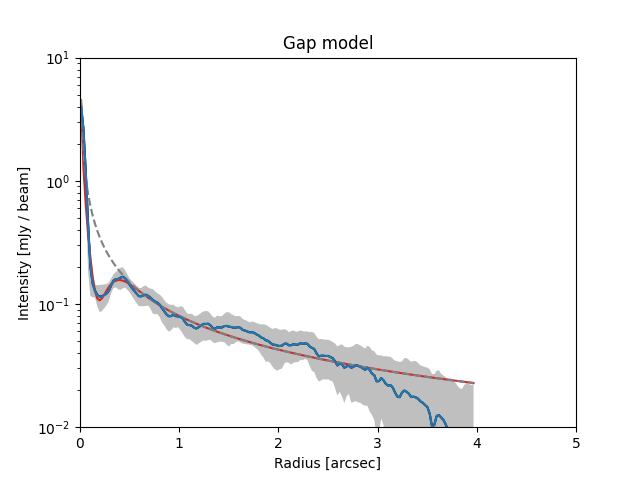

In [105]:
fig, ax = plt.subplots()
ax.plot(r, I, color="black")
ax.fill_between(r, I-dI, I+dI, color="black", alpha=0.25, edgecolor=None)
ax.plot(r, result.best_fit, color="tab:red")
comps = result.eval_components()
ax.plot(r, comps["compact_"]+comps["broad_"], ls="dashed", color="grey")
# ax.plot(r, 0.3 -comps["gap_"], ls="dashed", color="grey")
# ax.plot(r, comps["broad_"], ls="dashed", color="grey")
ax.plot(r, I - comps["compact_"])
ax.set(xlim=(0, 5), ylim=(1e-2, 10), yscale="log", xlabel="Radius [arcsec]", ylabel="Intensity [mJy / beam]")
ax.set_title("Gap model")

In [73]:
fig.savefig(au.figurepath+"L1489IRS_SBLB_continuum_robust_1.0.pbcor.tt0_radialProfileWedge90deg_gap_fit.png", dpi=500, bbox_inches="tight", pad_inches=0.01)

In [78]:
ax.plot(r, I - comps["compact_"])

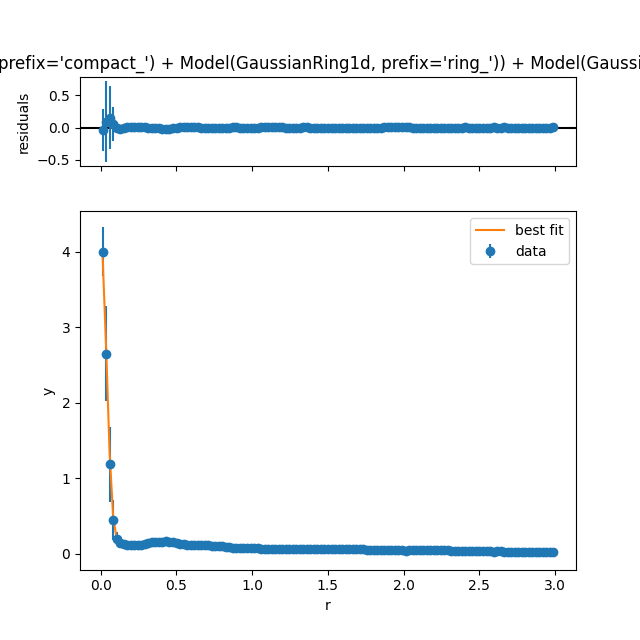

In [49]:
fig = result.plot()

In [25]:
90/140

0.6428571428571429